In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [ ]:
train_dir = '/kaggle/input/original-90-180-1/original   90  180 -20230506T094107Z-001/original  + 90 + 180 /train'
test_dir = '/kaggle/input/original-90-180-1/test/test'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=20,class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=20,class_mode='binary')

Found 2211 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


Convolutional Neural Network

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 26, 26, 128)     

In [ ]:
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.metrics import Precision, Recall,Accuracy
import numpy as np

class F1Score(metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.0010), metrics=['accuracy',Precision(), Recall(), F1Score()])

In [ ]:
history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//20,epochs=30,validation_data=test_generator,validation_steps=test_generator.samples//20)

/tmp/ipykernel_31/2903034868.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//20,epochs=30,validation_data=test_generator,validation_steps=test_generator.samples//20)


Epoch 1/30
110/110 [==============================] - 99s 877ms/step - loss: 1.0746 - accuracy: 0.6983 - precision_6: 0.3333 - recall_6: 0.0312 - f1_score: 0.0571 - val_loss: 0.6295 - val_accuracy: 0.6750 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00 - val_f1_score: nan
Epoch 2/30
110/110 [==============================] - 100s 903ms/step - loss: 0.5705 - accuracy: 0.7330 - precision_6: 0.6223 - recall_6: 0.2259 - f1_score: 0.3314 - val_loss: 0.6115 - val_accuracy: 0.7250 - val_precision_6: 1.0000 - val_recall_6: 0.1538 - val_f1_score: 0.2667
Epoch 3/30
110/110 [==============================] - 97s 884ms/step - loss: 0.5003 - accuracy: 0.7796 - precision_6: 0.7186 - recall_6: 0.4090 - f1_score: 0.5213 - val_loss: 0.5293 - val_accuracy: 0.7750 - val_precision_6: 1.0000 - val_recall_6: 0.1818 - val_f1_score: 0.3077
Epoch 4/30
110/110 [==============================] - 98s 891ms/step - loss: 0.4422 - accuracy: 0.7987 - precision_6: 0.7416 - recall_6: 0.4821 - f1_score: 0.5844 

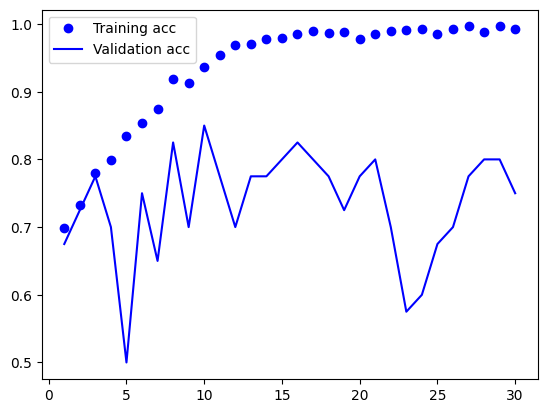

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.legend()



plt.show()

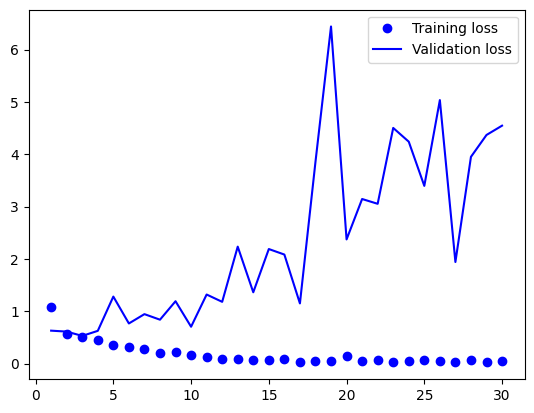

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()

In [ ]:
model.save('saliva42.h5')

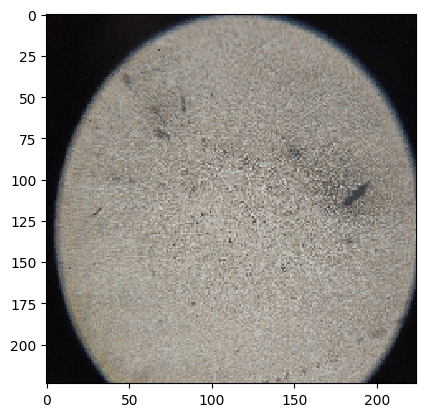

In [ ]:
from tensorflow.keras.preprocessing import image
path ='/kaggle/input/original-90-180-1/test/test/0/IMG_20210413_165025__01.jpg'
img = image.load_img(path,target_size=(224,224))
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
img_array = np.array(img)
img_array.shape

(224, 224, 3)

In [ ]:
img_array=img_array.reshape(1,224,224,3)

In [ ]:
a = model.predict(img_array)
if a==[[0]]:
    print('Atypical')
else:
    print('Typical')

1/1 [==============================] - 0s 86ms/step
Atypical
